### Loading histograms

In [1]:
from processing import load_csv_data, slice_labels

train_path = 'Datasets/espe/lbp_histograms/train'
train_data = load_csv_data(train_path)

test_path = 'Datasets/espe/lbp_histograms/test'
test_data = load_csv_data(test_path)

validation_path = 'Datasets/espe/lbp_histograms/validation'
validation_data = load_csv_data(validation_path)

# train_data.shape, test_data.shape, validation_data.shape
x_train, y_train = slice_labels(train_data)
x_test, y_test = slice_labels(test_data)
x_val, y_val = slice_labels(validation_data)

Using TensorFlow backend.


### Loading silhouette descriptors (area, perimeter)

In [2]:
import pandas as pd

silhouette_desc_path_test = 'Datasets/espe/lbp_histograms/test/test.csv'
silhouette_desc_path_train = 'Datasets/espe/lbp_histograms/train/train.csv'
silhouette_desc_path_val = 'Datasets/espe/lbp_histograms/validation/validation.csv'

test_sil_data = pd.read_csv(silhouette_desc_path_test)
train_sil_data = pd.read_csv(silhouette_desc_path_train)
val_sil_data = pd.read_csv(silhouette_desc_path_val)

x_test_sil_data, y_test_sil_data = slice_labels(test_sil_data)
x_train_sil_data, y_train_sil_data  = slice_labels(train_sil_data)
x_val_sil_data, y_val_sil_data = slice_labels(val_sil_data)

In [48]:
from utils.Models import complete_image_dataset_loading

rgb_train, rgb_test, rgb_validation = complete_image_dataset_loading(train_data_path, test_data_path, validation_data_path, (64, 64))

In [49]:
x_rgb_train, y_rgb_train = rgb_train[0], rgb_train[1]

### Load csv histograms

In [3]:
from processing import load_csv_data, slice_labels

train_path = 'Datasets/espe/lbp_histograms/train'
train_data = load_csv_data(train_path)

test_path = 'Datasets/espe/lbp_histograms/test'
test_data = load_csv_data(test_path)

validation_path = 'Datasets/espe/lbp_histograms/validation'
validation_data = load_csv_data(validation_path)

# train_data.shape, test_data.shape, validation_data.shape
x_train, y_train = slice_labels(train_data)
x_test, y_test = slice_labels(test_data)
x_val, y_val = slice_labels(validation_data)

In [4]:
from processing import load_image_dataset

x_rgb_train, y_rgb_train = load_image_dataset('Datasets/espe/base/train', (256, 256), True)
x_rgb_test, y_rgb_test = load_image_dataset('Datasets/espe/base/test', (256, 256), True)
x_rgb_validation, y_rgb_validation = load_image_dataset('Datasets/espe/base/validation', (256, 256), True)

In [22]:
from processing import load_csv_data, slice_labels

train_path = 'Datasets/espe/lbp_histograms/train'
train_data = load_csv_data(train_path)

test_path = 'Datasets/espe/lbp_histograms/test'
test_data = load_csv_data(test_path)

validation_path = 'Datasets/espe/lbp_histograms/validation'
validation_data = load_csv_data(validation_path)

# train_data.shape, test_data.shape, validation_data.shape
x_train, y_train = slice_labels(train_data)
x_test, y_test = slice_labels(test_data)
x_val, y_val = slice_labels(validation_data)

In [2]:
from tensorflow.keras.models import load_model
model = load_model('models/own/experiments/double_branch_model/experiment_1/sample_model3.h5')
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv2d_16_input (InputLayer)    [(None, 40, 40, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_17_input (InputLayer)    [(None, 40, 40, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 40, 40, 32)   320         conv2d_16_input[0][0]            
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 40, 40, 32)   320         conv2d_17_input[0][0]            
____________________________________________________________________________________________

In [1]:
from utils.Models import individual_feature_model
model = individual_feature_model((40, 40, 1))

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


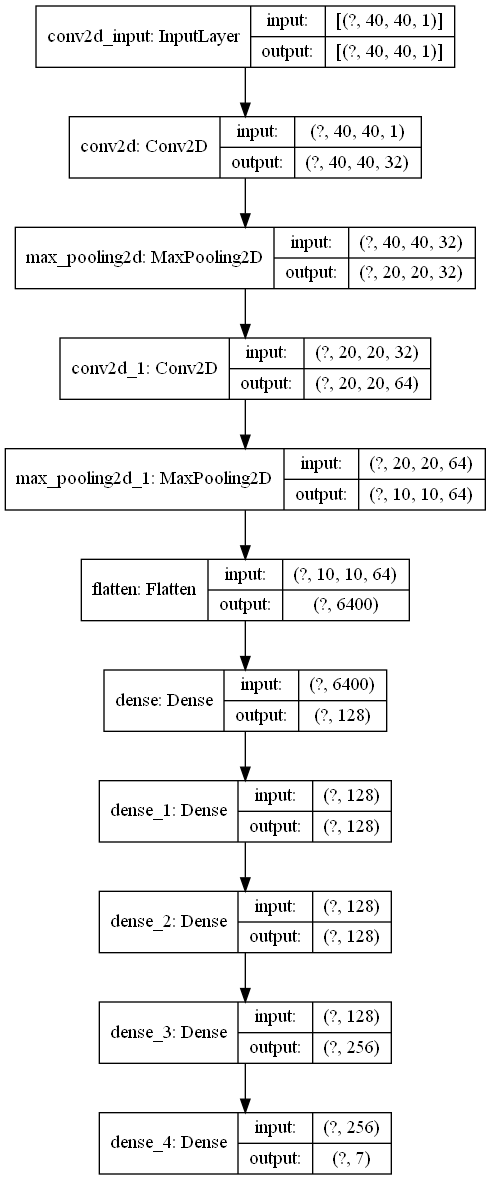

In [2]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model2.png', show_shapes=True, show_layer_names=True)

## Individual model for person identification with silhouette

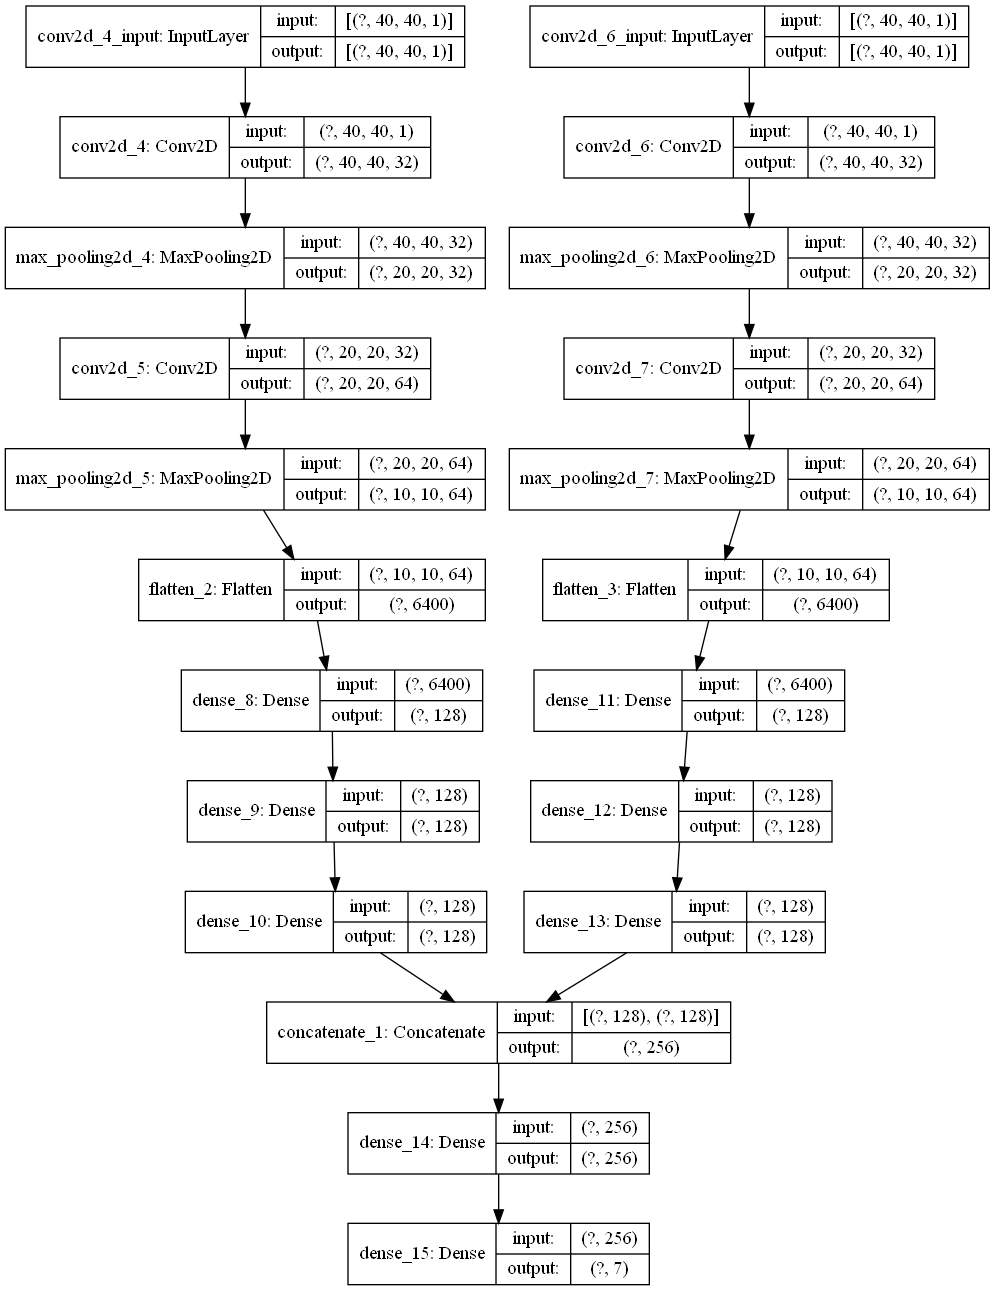

In [7]:
from utils.Models import prototype_model_for_reid
from tensorflow.keras.utils import plot_model
model = prototype_model_for_reid((40, 40, 1))
plot_model(model, 'model_sample.png', show_shapes=True)

# Market-1501

In [ ]:
from utils.Models import individual_feature_model
model = individual_feature_model((40, 40, 1))

model.fit(x=)

# Market-1501

In [ ]:
from utils.Models import individual_feature_model
model = individual_feature_model((40, 40, 1))

model.fit(x=)

# Market-1501

In [ ]:
from utils.Models import individual_feature_model
model = individual_feature_model((40, 40, 1))

model.fit(x=)

# Market-1501

In [ ]:
from utils.Models import individual_feature_model
model = individual_feature_model((40, 40, 1))

model.fit(x=)